In [7]:
pwd

'C:\\Anaconda3\\python\\자료의요약'

In [8]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: E048-85BB

 C:\Anaconda3\python\자료의요약 디렉터리

2018-07-13  오후 05:53    <DIR>          .
2018-07-13  오후 05:53    <DIR>          ..
2018-07-13  오후 05:51    <DIR>          .ipynb_checkpoints
2018-07-13  오후 05:47            22,285 자료의 요약.xlsx
2018-07-13  오후 05:53            15,086 자료의_요약과_Pandas_예제_ipynb의_사본.ipynb
               2개 파일              37,371 바이트
               3개 디렉터리  127,043,354,624 바이트 남음


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글폰트 깨짐방지
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/NanumGothic.ttf").get_name()
rc('font', family=font_name)


df = pd.read_excel('자료의 요약.xlsx', sheet_name='혈액형')
df

,혈액형
0,A
1,A
2,B
3,AB
4,O
5,AB
6,O
7,A
8,O
9,B


def get_sheet(title, sheet_name):
  gc = gspread.authorize(GoogleCredentials.get_application_default())
  return gc.open(title).worksheet(sheet_name)

# 자료의 요약 시트 불러오기

# 자료의 요약에 있는 특정 시트를 불러옵니다.
# 1번 row를 0번 인덱스로 읽어오는 데, 0번 인덱스를 컬럼으로 지정해 주도록 했습니다.
# 그러면 스프레드시트에서 봤던 것 처럼 데이터프레임이 생성됩니다.
def get_df(sheet_name):
  sheet = get_sheet('자료의 요약', sheet_name)

  # Create dataframe from the sheet
  rows = sheet.get_all_values()
  df = pd.DataFrame.from_records(rows)

  df.columns = df.iloc[0]
  df = df.reindex(df.index.drop(0))
  return df

sheet = get_df('자료의 요약', '혈액형')

# Create dataframe from the sheet
rows = sheet.get_all_values()
df = pd.DataFrame.from_records(rows)


df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0))

In [35]:
def get_df(name):
    df = pd.read_excel('자료의요약.xlsx', sheet_name = name)
    return df

# 혈액형

In [14]:
#df_blood = get_df('혈액형')
df_blood = pd.read_excel('자료의 요약.xlsx', sheet_name='혈액형')
# 상위 5개의 데이터를 가져옵니다.
print(df_blood.shape)
df_blood.tail(5)

(22, 1)


,혈액형
17,O
18,B
19,B
20,A
21,A


In [15]:
df_blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 1 columns):
혈액형    22 non-null object
dtypes: object(1)
memory usage: 256.0+ bytes


In [16]:
df_blood.values

array([['A'],
       ['A'],
       ['B'],
       ['AB'],
       ['O'],
       ['AB'],
       ['O'],
       ['A'],
       ['O'],
       ['B'],
       ['AB'],
       ['O'],
       ['AB'],
       ['A'],
       ['A'],
       ['AB'],
       ['A'],
       ['O'],
       ['B'],
       ['B'],
       ['A'],
       ['A']], dtype=object)

In [17]:
df_blood.count()

혈액형    22
dtype: int64

In [18]:
df_blood['blood_categories'] = df['혈액형'].astype('category')
df_blood['blood_categories']

0      A
1      A
2      B
3     AB
4      O
5     AB
6      O
7      A
8      O
9      B
10    AB
11     O
12    AB
13     A
14     A
15    AB
16     A
17     O
18     B
19     B
20     A
21     A
Name: blood_categories, dtype: category
Categories (4, object): [A, AB, B, O]

In [19]:
df_blood.groupby('혈액형').size()

혈액형
A     8
AB    5
B     4
O     5
dtype: int64

In [20]:
df_blood['blood_categories'].value_counts()

A     8
O     5
AB    5
B     4
Name: blood_categories, dtype: int64

In [47]:
df_blood['blood_categories'].value_counts().index

CategoricalIndex(['A', 'O', 'AB', 'B'], categories=['A', 'AB', 'B', 'O'], ordered=False, dtype='category')

### 혈액형별 인원수를 막대그래프로 나타내기

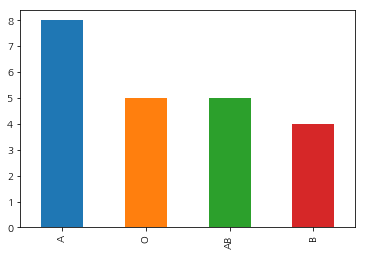

In [52]:
df_blood['blood_categories'].value_counts().plot(kind='bar')

In [23]:
df_blood['blood_categories'].size().plot(kind='bar')
# value_counts()가 아닌 size()로 하면 에러가 난다.

TypeError: 'int' object is not callable

### 혈액형별 인원수를 파이그래프로 나타내기

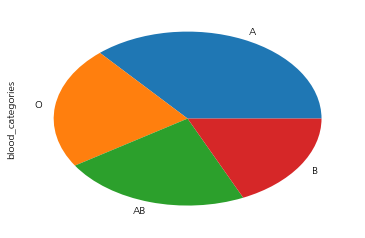

In [38]:
df_blood['blood_categories'].value_counts().plot(kind='pie')

In [24]:
# 퍼센트(ratio)표시하기
#ratio = df_blood['blood_categories'].
blood_sum = df_blood.count()
blood_ratio = df_blood['blood_categories'].value_counts().apply(lambda x: x/blood_sum*100)
blood_ratio

,혈액형,blood_categories
A,36.363636,36.363636
O,22.727273,22.727273
AB,22.727273,22.727273
B,18.181818,18.181818


In [54]:
blood_ratio['혈액형']

A     36.363636
O     22.727273
AB    22.727273
B     18.181818
Name: 혈액형, dtype: float64

In [26]:
blood_ratio['blood_categories']

A     36.363636
O     22.727273
AB    22.727273
B     18.181818
Name: blood_categories, dtype: float64

([<matplotlib.patches.Wedge at 0xf7cabef6a0>,
 [Text(0.456956,1.0006,'A'),
  Text(-1.0888,0.156546,'O'),
  Text(-0.309906,-1.05544,'AB'),
  Text(0.925379,-0.594705,'B')],
 [Text(0.249249,0.545779,'36.4%'),
  Text(-0.593893,0.0853888,'22.7%'),
  Text(-0.169039,-0.575696,'22.7%'),
  Text(0.504752,-0.324384,'18.2%')])

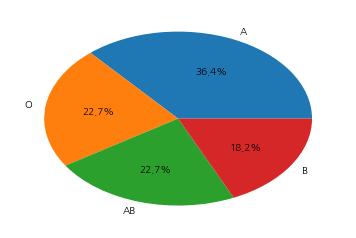

In [51]:
#퍼센테이지 표기하기
# %1.0f%% 정수 , %1.1f%% 소숫점아래 1자리까지
plt.pie(df_blood['blood_categories'].value_counts(),labels=df_blood['blood_categories'].value_counts().index,autopct='%1.1f%%')

# 조선왕

In [37]:
#df_king = get_df('조선왕')
df_king = pd.read_excel('자료의 요약.xlsx', sheet_name='조선왕')
# 상위 5개의 데이터를 가져옵니다.
print(df_king.shape)
df_king.tail()

(27, 3)


,name,life,period
22,순조,44,34
23,헌종,22,15
24,철종,32,14
25,고종,67,43
26,순종,52,4


In [57]:
# 어떤 컬럼이 있고 데이터의 row, column 수, 데이터 타입을 볼 수 있다.
df_king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
name      27 non-null object
life      27 non-null int64
period    27 non-null int64
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


In [58]:
df_king.describe()

,life,period
count,27.000000,27.000000
mean,46.111111,19.259259
std,16.678714,15.383789
min,16.000000,1.000000
25%,33.000000,5.500000
50%,48.000000,15.000000
75%,56.000000,29.500000
max,82.000000,52.000000


In [59]:
df_king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
name      27 non-null object
life      27 non-null int64
period    27 non-null int64
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


In [60]:
# 데이터 타입을 int로 변경해 준다.
df_king['life'] = df_king['life'].astype(int)
df_king['period'] = df_king['period'].astype(int)
# 위와 describe() 했을 때의 정보가 다르다. 
# 수치형 데이터 일 때 count, mean, std, min/max, 사분위수를 보여준다.
df_king.describe()

,life,period
count,27.000000,27.000000
mean,46.111111,19.259259
std,16.678714,15.383789
min,16.000000,1.000000
25%,33.000000,5.500000
50%,48.000000,15.000000
75%,56.000000,29.500000
max,82.000000,52.000000


In [61]:
# 결측치를 보고 싶을 때 널값을 구해 본다.
df_king.isnull().sum()

name      0
life      0
period    0
dtype: int64

In [62]:
# 가장 오래 집권한 왕순으로 정렬해 보고 상위 5개의 데이터만 본다.
df_king.sort_values(by='period', ascending=False).head()

,name,life,period
20,영조,82,52
18,숙종,59,46
25,고종,67,43
13,선조,56,41
10,중종,56,39


In [63]:
# 평균값만 본다.
df_king.mean()

life      46.111111
period    19.259259
dtype: float64

In [64]:
# 표준편차만 본다.
df_king.std()

life      16.678714
period    15.383789
dtype: float64

In [65]:
# 최대값만 본다. 효종이 나온 이유는 한글 중에 가장 뒤에 있기 때문
# life, period도 각 컬럼에서 최대값
df_king.max()

name      효종
life      82
period    52
dtype: object

In [66]:
df_king['period'].max()

52

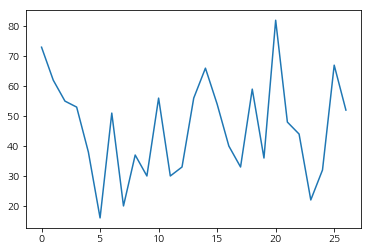

In [67]:
df_king['life'].plot()

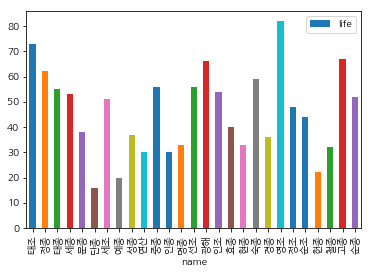

In [43]:
df_king.plot(kind='bar',x='name',y='life')

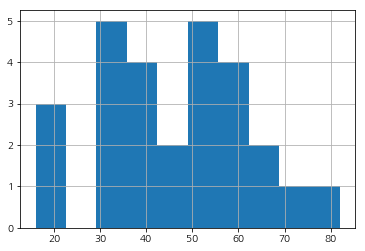

In [76]:
df_king['life'].hist()

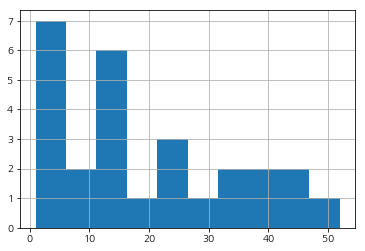

In [70]:
df_king['period'].hist(stacked=True, bins=10)

# 타이타닉

In [67]:
#df_titanic = get_df('타이타닉')
df_titanic = pd.read_excel('자료의 요약.xlsx', sheet_name='타이타닉')
print(df_titanic.shape)
# 상위 5개의 데이터를 가져옵니다.
df_titanic.head()

(101, 2)


,Class,생존여부
0,crew,no
1,3등급,no
2,crew,no
3,crew,no
4,1등급,yes


In [68]:
# 어떤 컬럼이 있는지 보여줍니다.
df_titanic.columns

Index(['Class', '생존여부'], dtype='object')

In [69]:
# 컬럼 정보를 보여줍니다.
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
Class    101 non-null object
생존여부     101 non-null object
dtypes: object(2)
memory usage: 1.7+ KB


In [70]:
# 자료의 요약을 보여줍니다.
df_titanic.describe()

,Class,생존여부
count,101,101
unique,4,2
top,crew,no
freq,36,54


In [71]:
df_titanic['Class'].value_counts()

crew    36
3등급     33
2등급     19
1등급     13
Name: Class, dtype: int64

In [72]:
df_titanic['생존여부'].value_counts()

no     54
yes    47
Name: 생존여부, dtype: int64

# 화장지 불량률

In [4]:
#df_tpaper = get_df('화장지 불량률')
df_tpaper = pd.read_excel('자료의 요약.xlsx', sheet_name='화장지 불량률')
df_tpaper.head()

,화장지 불량 종류
0,크기 불량
1,찢어짐
2,구멍뚫림
3,찢어짐
4,잘못접혀짐


In [5]:
df_tpaper.columns

Index(['화장지 불량 종류'], dtype='object')

In [6]:
df_tpaper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
화장지 불량 종류    50 non-null object
dtypes: object(1)
memory usage: 480.0+ bytes


In [7]:
df_tpaper.describe()

,화장지 불량 종류
count,50
unique,6
top,찢어짐
freq,23


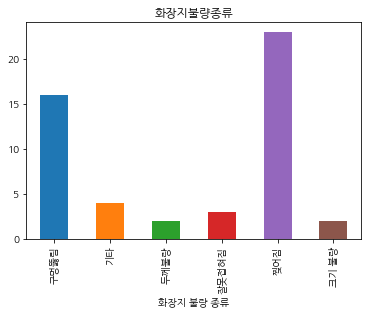

In [9]:
df_tpaper.groupby('화장지 불량 종류').size().plot(kind='bar',title='화장지불량종류')

# GNP

In [10]:
df_gnp = pd.read_excel('자료의 요약.xlsx', sheet_name='GNP')
df_gnp.head()

,국가,GNP대비 교육비 지출 비율
0,한국,4.4
1,일본,4.0
2,미국,5.3
3,타이완,5.7
4,캐나다,7.6


In [11]:
df_gnp.describe()

,GNP대비 교육비 지출 비율
count,8.000000
mean,5.387500
std,1.065615
min,4.000000
25%,5.000000
50%,5.350000
75%,5.550000
max,7.600000


In [12]:
df_gnp.mean()

GNP대비 교육비 지출 비율    5.3875
dtype: float64

In [30]:
df_gnp['국가']

0       한국
1       일본
2       미국
3      타이완
4      캐나다
5       영국
6     이탈리아
7    말레이시아
Name: 국가, dtype: object

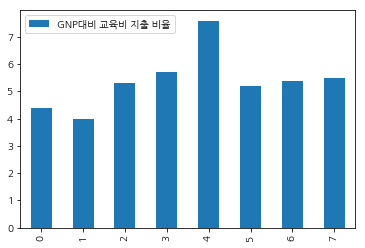

In [35]:
df_gnp.plot(kind='bar')

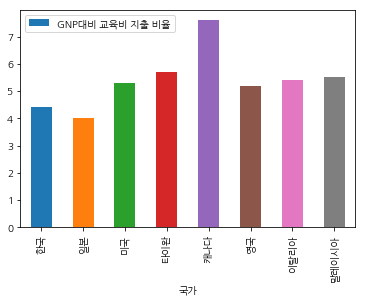

In [34]:
df_gnp.plot(kind='bar',x ='국가', y ='GNP대비 교육비 지출 비율') 

# 집 값

In [46]:
df_realest = pd.read_excel('자료의 요약.xlsx',sheet_name='집 값')

In [47]:
df_realest.head()

,도심&외각,주택가격
0,outer,24.0
1,outer,21.6
2,outer,34.7
3,outer,33.4
4,outer,36.2


In [48]:
df_realest.tail()

,도심&외각,주택가격
501,inner,22.4
502,inner,20.6
503,inner,23.9
504,inner,22.0
505,inner,11.9


In [49]:
df_realest.describe()

,주택가격
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [52]:
df_realest.groupby('도심&외각').size()

도심&외각
inner    253
outer    253
dtype: int64

In [ ]:
# 도심, 외각 집값 

In [56]:
# 도심, 외각 집값 평균
df_realest.groupby('도심&외각').mean()

,주택가격
도심&외각,
inner,20.027668
outer,25.037945


도심&외각
inner    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
outer    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

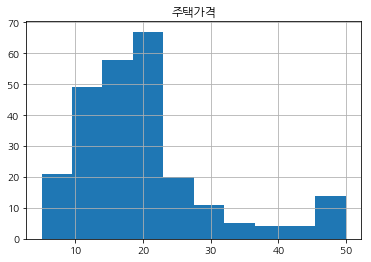

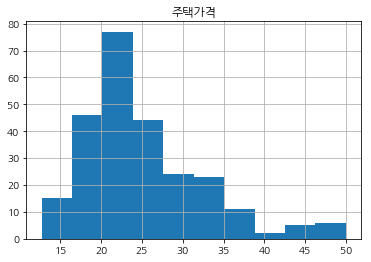

In [67]:
#도심집값히스토그램
df_realest.groupby('도심&외각').hist()